# Financial Data Analysis
## Introduction
This analysis examines financial trends for Microsoft, Tesla, and Apple over the past three years.
## Methodology
We calculated Year-over-Year growth percentages for revenue, net income, assets, liabilities, and cash flow.

In [2]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Load the dataset 
df = pd.read_excel('C:/Users/Admin/Desktop/BCG Job Simulation/Dataset.xlsx')

In [4]:
# Display the dataset
df

,Year,Company,Total Revenue,Net Income,Total Assets,Total Liabilities,Cash Flow from Operating Activities
0,2022,Microsoft,198270,72738,364840,198298,89035
1,2022,Tesla,81462,12587,82338,36440,14724
2,2022,Apple,394328,99803,352583,302083,122151
3,2023,Microsoft,211915,72361,411976,205753,87582
4,2023,Tesla,96733,14974,106618,43009,13256
5,2023,Apple,383285,96995,352583,290437,110543
6,2024,Microsoft,245122,88136,512163,243686,118548
7,2024,Tesla,97690,7153,122070,48390,14923
8,2024,Apple,391035,93736,364980,308030,118254


In [5]:
# Check the dataset structure
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 7 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   Year                                 9 non-null      int64 
 1   Company                              9 non-null      object
 2   Total Revenue                        9 non-null      int64 
 3   Net Income                           9 non-null      int64 
 4   Total Assets                         9 non-null      int64 
 5   Total Liabilities                    9 non-null      int64 
 6   Cash Flow from Operating Activities  9 non-null      int64 
dtypes: int64(6), object(1)
memory usage: 636.0+ bytes


In [6]:
# Calculate Year-over-Year Growth for key financial metrics
df['Revenue Growth (%)'] = df.groupby(['Company'])['Total Revenue'].pct_change() * 100
df['Net Income Growth (%)'] = df.groupby(['Company'])['Net Income'].pct_change() * 100
df['Asset Growth (%)'] = df.groupby('Company')['Total Assets'].pct_change() * 100
df['Liability Growth (%)'] = df.groupby('Company')['Total Liabilities'].pct_change() * 100
df['Cash Flow Growth (%)'] = df.groupby('Company')['Cash Flow from Operating Activities'].pct_change() * 100

In [7]:
# Handle missing values
df.fillna(0, inplace=True)

In [8]:
# Display updated dataset with growth metrics
df
df.to_excel("financial_data.xlsx", index=False)

In [9]:
# Group by company and calculate the average growth across all years
growth_summary = df.groupby('Company')[['Revenue Growth (%)', 'Net Income Growth (%)', 
                                        'Asset Growth (%)', 'Liability Growth (%)', 
                                        'Cash Flow Growth (%)']].mean()
#Display the summary table
growth_summary

,Revenue Growth (%),Net Income Growth (%),Asset Growth (%),Liability Growth (%),Cash Flow Growth (%)
Company,,,,,
Apple,-0.259489,-2.057837,1.172017,0.734064,-0.842475
Microsoft,7.517331,7.094040,12.412762,7.398559,11.241546
Tesla,6.578495,-11.088841,14.660357,10.179409,0.868440


In [10]:
# Reset index to make 'Company' a column
growth_summary = growth_summary.reset_index()
# Melt the DataFrame for easier visualization
growth_summary_melted = growth_summary.melt(id_vars='Company', var_name='Metric', value_name='Mean Growth (%)')

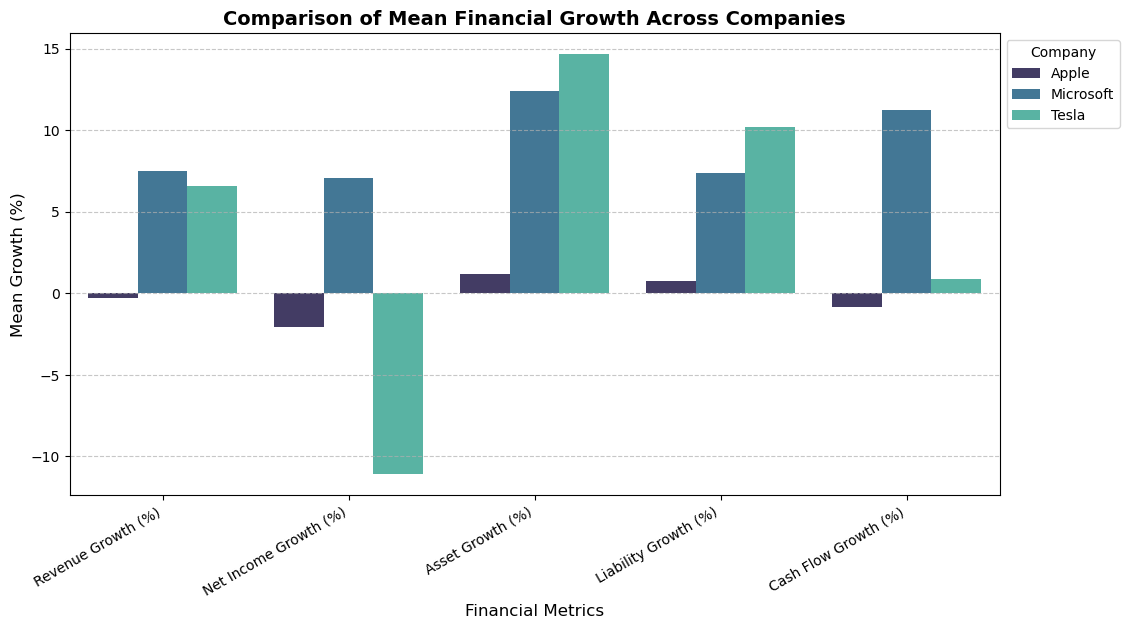

In [11]:
plt.figure(figsize=(12, 6))
# Create a bar plot with customized colours and aesthetics
sns.barplot(data=growth_summary_melted, x='Metric', y='Mean Growth (%)', hue='Company', palette='mako')
# Customize the graph
plt.title('Comparison of Mean Financial Growth Across Companies', fontsize=14, fontweight='bold')
plt.xlabel('Financial Metrics', fontsize=12)
plt.ylabel('Mean Growth (%)', fontsize=12)
plt.xticks(rotation=30, ha='right') 
plt.legend(title='Company', bbox_to_anchor=(1, 1))  
plt.grid(axis='y', linestyle='--', alpha=0.7)  

# Show the final plot
plt.show()

## **Conclusions:**

- **Microsoft** and **Apple** both demonstrate **stable, long-term growth** across all financial metrics, with Apple leading in asset growth and revenue stability.
- **Tesla** shows **high volatility** but also significant growth in certain metrics, particularly in revenue and liabilities. 
- Companies with **higher volatility** like Tesla often reflect the rapid innovation and scaling of emerging sectors, which come with both higher potential returns and risks.
- Overall, while **Apple** and **Microsoft** offer stable, predictable growth, **Tesla** presents higher **risk** but also a higher potential for returns as it continues to scale and mature.